# Dijkstra's Shortest Path Algorithm

References:
- https://en.wikipedia.org/wiki/Dijkstra%27s_algorithm
- http://www.gilles-bertrand.com/2014/03/disjkstra-algorithm-description-shortest-path-pseudo-code-data-structure-example-image.html
- http://www.gilles-bertrand.com/2014/03/dijkstra-algorithm-python-example-source-code-shortest-path.html



In [1]:
import networkx as nx
import matplotlib.pyplot as plt

%matplotlib inline

## Implementation (from Giles Bertrand)

In [2]:
debug = 0

In [3]:
def dijkstra(graph, src, dst, visited=[], distances={}, predecessors={}):
    """ calculates a shortest path tree rooted at src
    """
    
    #print('dijkstra() src:',src,'dst:',dst)
    if src not in graph:
        raise TypeError('The root of the shortest path tree cannot be found')
    if dst not in graph:
        raise TypeError('The target of the shortest path cannot be found')
    
    # ending condition
    if src == dst:
        # build the shortest path and display it
        path = []
        pred = dst
        while pred != None:
            path.append(pred)
            pred = predecessors.get(pred, None)
        revd = []
        for i in reversed(path):
            revd.append(i)
        if debug == 1: print('Shortest path:', revd)
        if debug == 1: print('cost:', distances[dst])
        return {'source': revd[0], 'destination': revd[len(revd)-1], 'path': revd, 'cost': distances[dst]}
    else:
        # if initial run, init the cost
        if not visited:
            if debug == 1: print('setting distances[',src,'] = 0')
            distances[src] = 0
            
        # visit the neighbors
        for neighbor in graph[src]:
            if debug == 1: print('visit neighbor:',neighbor)
            if neighbor not in visited:
                new_distance = distances[src] + graph[src][neighbor]
                if debug == 1: print('distance to',neighbor,'through',src,'(',distances[src],'+',graph[src][neighbor],')','is',new_distance)
                if new_distance < distances.get(neighbor, float('inf')):
                    if debug == 1: print('setting distances[',neighbor,'] =', new_distance)
                    distances[neighbor] = new_distance
                    predecessors[neighbor] = src
            else:
                if debug == 1: print('skip:',neighbor, 'has been visited')
        
        # mark as visited
        if debug == 1: print('marking',src,'as visited')
        visited.append(src)
            
        # now that all neighbors have been visited: recurse
        # select the non-visited node with lowest distance 'x'
        # run Dijkstra with src='x'
        unvisited = {}
        for k in graph:
            if k not in visited:
                unvisited[k] = distances.get(k ,float('inf'))
                if debug == 1: print('unvisited[',k,'] =', unvisited[k])
        x = min(unvisited, key=unvisited.get)
        return dijkstra(graph, x, dst, visited, distances, predecessors)

## Example Network

![](http://1.bp.blogspot.com/-oFvhMiNhHv8/UyAsz3aYySI/AAAAAAAAE0M/qzIwowiWGiQ/s1600/IMG_0165.JPG)

In [4]:
graph = {
    's': {'a': 2, 'b': 1},
    'a': {'s': 3, 'b': 4, 'c': 8},
    'b': {'s': 4, 'a': 2, 'd': 2},
    'c': {'a': 2, 'd': 7, 't': 4},
    'd': {'b': 1, 'c': 11, 't': 5},
    't': {'c': 3, 'd': 5}
}

### Run with example network

In [5]:
src = 's'
dst = 't'

In [6]:
shortest_path = dijkstra(graph, src, dst)

In [7]:
shortest_path

{'cost': 8, 'destination': 't', 'path': ['s', 'b', 'd', 't'], 'source': 's'}

## Attempts to visualize the network in Jupyter Notebook

In [8]:
G = nx.DiGraph()

for src in graph:
    G.add_node(src,name=src)
    for dst in graph[src]:
        weight = graph[src][dst]
        #print('adding edge:',src,'->',dst,'=',weight)
        G.add_edge(src,dst,weight=weight)

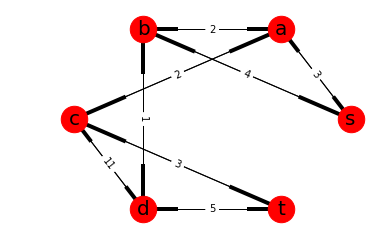

In [9]:
elarge=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] >0.5]
esmall=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] <=0.5]

#pos=nx.spring_layout(G) # positions for all nodes
pos = nx.circular_layout(G)

# nodes
nx.draw_networkx_nodes(G,pos,node_size=700)

# edges
nx.draw_networkx_edges(G,pos,edgelist=elarge,
                    width=1)
nx.draw_networkx_edges(G,pos,edgelist=esmall,
                    width=1,alpha=0.5,edge_color='b',style='dashed')

# labels
nx.draw_networkx_labels(G,pos,font_size=20,font_family='sans-serif')

labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)

plt.axis('off')
#plt.savefig("weighted_graph.png") # save as png
plt.show() # display